**Exploratory Data Analysis**

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
data_path = "../data/GDSC2_processed.csv"
data = pd.read_csv(data_path)

Basic information about the dataset

In [6]:
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())

Dataset Shape: (36466, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36466 entries, 0 to 36465
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cell_line_name     36466 non-null  object 
 1   drug_name          36466 non-null  object 
 2   putative_target    36466 non-null  object 
 3   ln_ic50            36466 non-null  float64
 4   cell_line_encoded  36466 non-null  int64  
 5   drug_encoded       36466 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.7+ MB
None


Key attributes of categorical variables

In [10]:
unique_counts = {
    "Variable": ["cell_line_name", "drug_name", "putative_target"],
    "Unique Values": [
        data["cell_line_name"].nunique(),
        data["drug_name"].nunique(),
        data["putative_target"].nunique()
    ]
}
unique_df = pd.DataFrame(unique_counts)

from tabulate import tabulate
print("\n", tabulate(unique_df, headers="keys", tablefmt="pretty"))


 +---+-----------------+---------------+
|   |    Variable     | Unique Values |
+---+-----------------+---------------+
| 0 | cell_line_name  |      968      |
| 1 |    drug_name    |      158      |
| 2 | putative_target |      122      |
+---+-----------------+---------------+


In [19]:
top_cell_lines = data["cell_line_name"].value_counts().head(5).reset_index()
top_cell_lines.columns = ["Cell Line Name", "Count"]
print("\nTop 5 Cell Lines by Count:")
print(tabulate(top_cell_lines, headers="keys", tablefmt="pretty"))


Top 5 Cell Lines by Count:
+---+----------------+-------+
|   | Cell Line Name | Count |
+---+----------------+-------+
| 0 |     JVM-2      |  88   |
| 1 |     A2780      |  85   |
| 2 |     BPH-1      |  78   |
| 3 |     JVM-3      |  78   |
| 4 |     CAL-54     |  76   |
+---+----------------+-------+


Distribution of target variable IC50 scores in the processed dataset

In [20]:
top_cell_lines = data["drug_name"].value_counts().head(5).reset_index()
top_cell_lines.columns = ["Drug Name", "Count"]
print("\nTop 5 Drugs by Count:")
print(tabulate(top_cell_lines, headers="keys", tablefmt="pretty"))


Top 5 Drugs by Count:
+---+-------------------------+-------+
|   |        Drug Name        | Count |
+---+-------------------------+-------+
| 0 |         MG-132          |  929  |
| 1 |       Sabutoclax        |  819  |
| 2 |      Staurosporine      |  813  |
| 3 |       Dinaciclib        |  804  |
| 4 | Telomerase Inhibitor IX |  768  |
+---+-------------------------+-------+


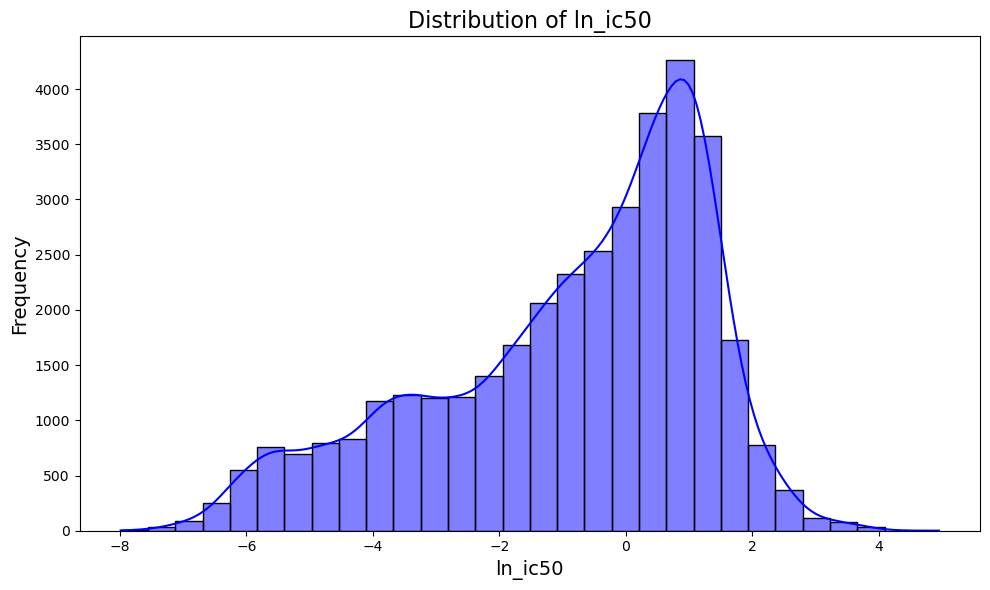

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data["ln_ic50"], kde=True, bins=30, color="blue")
plt.title("Distribution of ln_ic50", fontsize=16)
plt.xlabel("ln_ic50", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

In [18]:
Q1 = data['ln_ic50'].quantile(0.25)
Q3 = data['ln_ic50'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['ln_ic50'] < lower_bound) | (data['ln_ic50'] > upper_bound)]
print(f"Number of outliers in ln_ic50: {len(outliers)}")

Number of outliers in ln_ic50: 62


In [22]:
# Remove outliers
data_cleaned = data[~((data['ln_ic50'] < lower_bound) | (data['ln_ic50'] > upper_bound))]
print(f"Dataset shape after removing outliers: {data_cleaned.shape}")

# Save the cleaned dataset
data_cleaned.to_csv("../data/GDSC2_cleaned.csv", index=False)
print("Cleaned dataset saved to data/GDSC2_processed_cleaned.csv")

Dataset shape after removing outliers: (36404, 6)
Cleaned dataset saved to data/GDSC2_processed_cleaned.csv


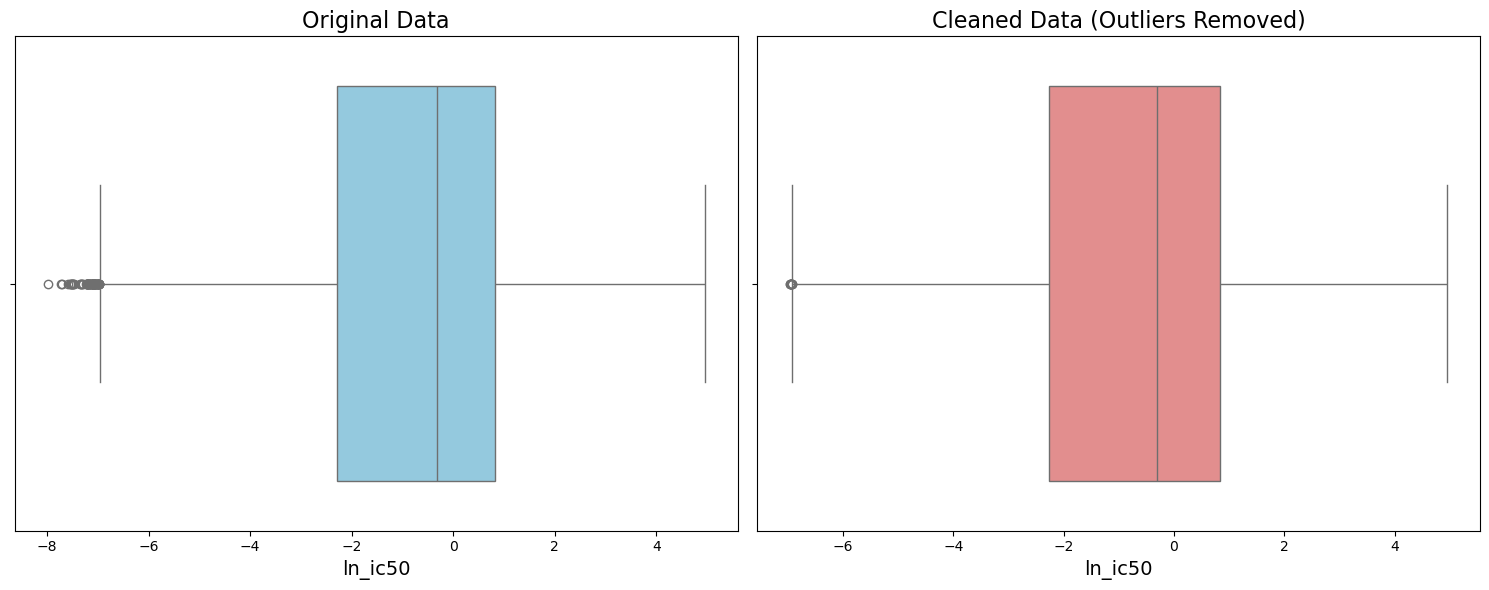

In [25]:
# Compare original and cleaned data side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Original data boxplot
sns.boxplot(ax=axes[0], x=data["ln_ic50"], color="skyblue")
axes[0].set_title("Original Data", fontsize=16)
axes[0].set_xlabel("ln_ic50", fontsize=14)

# Cleaned data boxplot
sns.boxplot(ax=axes[1], x=data_cleaned["ln_ic50"], color="lightcoral")
axes[1].set_title("Cleaned Data (Outliers Removed)", fontsize=16)
axes[1].set_xlabel("ln_ic50", fontsize=14)

plt.tight_layout()
plt.show()